# Proyek Analisis Data: Bike Sharing Dataset

- **Nama:** Achmad Fariz Rizky Yanuar
- **Email:** 03achmadfariz@gmail.com
- **ID Dicoding:** fcrizz

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

## Data Wrangling

### Gathering Data


In [2]:
bike_df = pd.read_csv("hour.csv")
bike_df.head(5)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


Baca dataset "hour.csv" dan simpan ke dalam variabel bike_df sebagai dataframe kita nanti. Selanjutnya, tampilkan 5 samples teratas dari bike_df

## Assesing Data

### Menilai tabel `bike_df`




In [3]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


Melihat info dari dataset bike. Terdapat list kolom-kolom yang ada di dataset berserta jumlah nilai yang tidak null dan tipe data kolom tersebut

In [4]:
bike_df.isna().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Melakukan pengecekkan jumlah dari nilai NaN. Hasilnya, tidak ditemukan NaN values di dalam dataset ini

In [5]:
print("Jumlah duplikasi:", bike_df.duplicated().sum())

Jumlah duplikasi: 0


Tidak ditemukan pula duplikasi data

In [6]:
bike_df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


Dengan menggunakan desribe() kita bisa melihat count, mean, std, min, max dan 3 kuartil dari setiap kolom yang memilki tipe data numerik.

### Modifikasi tabel 'bike_df'

In [7]:
bike_df.rename(columns={'dteday': 'datetimes', 'yr': 'year', 'mnth': 'month', 'hr': 'hour', 'weathersit': 'weathersituation', 'cnt': 'count'}, inplace=True)
bike_df.head(3)


,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


ubah nama kolom menjadi lebih mudah dimengerti

## Cleaning data



In [9]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   instant           17379 non-null  int64  
 1   datetimes         17379 non-null  object 
 2   season            17379 non-null  int64  
 3   year              17379 non-null  int64  
 4   month             17379 non-null  int64  
 5   hour              17379 non-null  int64  
 6   holiday           17379 non-null  int64  
 7   weekday           17379 non-null  int64  
 8   workingday        17379 non-null  int64  
 9   weathersituation  17379 non-null  int64  
 10  temp              17379 non-null  float64
 11  atemp             17379 non-null  float64
 12  hum               17379 non-null  float64
 13  windspeed         17379 non-null  float64
 14  casual            17379 non-null  int64  
 15  registered        17379 non-null  int64  
 16  count             17379 non-null  int64 

### Ubah data type


In [10]:
print(bike_df["datetimes"].dtypes)

object


Kita bisa lihat di sini datetimes masih bertipe data onject, sebaiknya kita ubah tipe datanya

In [11]:
bike_df["datetimes"] = pd.to_datetime(bike_df["datetimes"])
print(bike_df["datetimes"].dtypes)

datetime64[ns]


tipe data kolom datetimes telah bertipe data datetime64

## Exploratory Data Analysis (EDA)

### Explore `bike_df`

In [12]:
bike_df.sample(5)

,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,count
2150,2151,2011-04-04,2,0,4,11,0,1,1,1,0.60,0.6212,0.40,0.3881,58,66,124
13618,13619,2012-07-26,3,1,7,15,0,4,1,1,0.92,0.8939,0.42,0.2985,65,173,238
3752,3753,2011-06-10,2,0,6,6,0,5,1,1,0.66,0.6061,0.78,0.0896,10,94,104
13971,13972,2012-08-10,3,1,8,8,0,5,1,3,0.62,0.5455,0.91,0.1642,7,112,119
11112,11113,2012-04-13,2,1,4,5,0,5,1,2,0.34,0.3333,0.53,0.1642,2,19,21


melakuka sampling 5 sample acak di dataset

In [13]:
bike_df.describe(include="all")

<ipython-input-13-1fd7ad7f3914>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  bike_df.describe(include="all")


,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,count
count,17379.0000,17379,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,8690.0000,NaN,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,NaN,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,NaN,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000


melihat deksripsi data. `include="all"` artinya kita juga memasukan kolom yang datanya non-numerik

In [14]:
# unregistered = count - registered
bike_df['unregistered'] = bike_df['count'] - bike_df['registered']

# susun urutan
order = ['instant', 'datetimes', 'season', 'year', 'month', 'hour', 'holiday', 'weekday', 'workingday', 'weathersituation', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'unregistered', 'count']
bike_df = bike_df[order]
bike_df.head()

,instant,datetimes,season,year,month,hour,holiday,weekday,workingday,weathersituation,temp,atemp,hum,windspeed,casual,registered,unregistered,count
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,3,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,8,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,5,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,3,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,0,1


kita lihat ada kolom registered, tetapi tidak ada kolom yang menunjukkan jumlah unregistered. Maka dari itu, kita bisa buat kolom unregistered dengan melakukan proses aritmatika count - registered

In [15]:
bike_df.groupby(by="season").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
       nunique   max min        mean
season                              
1         4242   801   1  111.114569
2         4409   957   1  208.344069
3         4496   977   1  236.016237
4         4232   967   1  198.868856

Di sini kita melihat distribusi data dari setiap seasonnya

In [16]:
bike_df.groupby(by="year").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
     nunique   max min        mean
year                              
0       8645   651   1  143.794448
1       8734   977   1  234.666361

Di sini kita melihat distribusi data dari setiap tahunnya

In [17]:
bike_df.groupby(by="weathersituation").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
                 nunique   max min        mean
weathersituation                              
1                  11413   977   1  204.869272
2                   4544   957   1  175.165493
3                   1419   891   1  111.579281
4                      3   164  23   74.333333

Di sini kita melihat distribusi data dari setiap situasi cuacanya

In [18]:
bike_df.groupby(by="workingday").agg({
    "instant": "nunique",
    "count": ["max", "min", "mean"]
})

instant count                
           nunique   max min        mean
workingday                              
0             5514   783   1  181.405332
1            11865   977   1  193.207754

Di sini kita melihat distribusi data dari setiap hari kerja dan hari libur

In [29]:
bike_df.groupby(by=["year"]).agg({
    "registered": lambda x: math.ceil(x.mean()),
    "unregistered": lambda x: math.ceil(x.mean()),
    "count": lambda x: math.ceil(x.mean())
}).reset_index()

,year,registered,unregistered,count
0,0,116,29,144
1,1,192,43,235


Di sini kita melihat rata-rata distribusi data dari setiap tahunnya untuk tiap pengguna registered dan unregistered

## Visualization & Explanotory Analysis

### Bagaimana rata-rata penyewaan pada setiap musim?

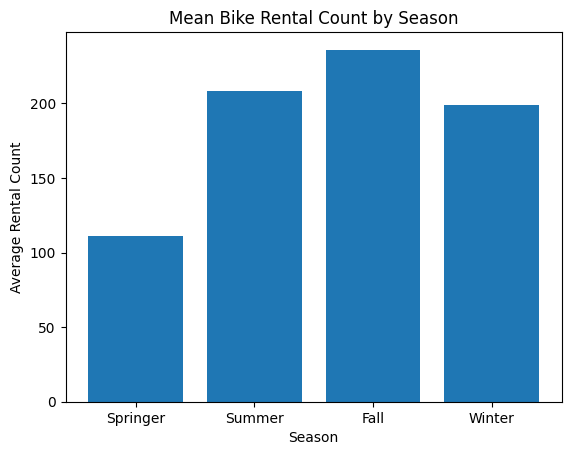

In [21]:
avg_season_df = bike_df.groupby('season')['count'].mean()

plt.bar(avg_season_df.index, avg_season_df.values, color='#1f77b4')

plt.xticks([1, 2, 3, 4], ['Springer', 'Summer', 'Fall', 'Winter'])

plt.title('Mean Bike Rental Count by Season')
plt.xlabel('Season')
plt.ylabel('Average Rental Count')

plt.show()

Melakukan pengelompokkan data berdasarkan musimnya dan perhitungan rata-rata jumlah penyewaan sepeda tiap musimnya. Ubah nama seasonnya menjadi nama sebenarnya. Set label sumbu x menjadi season dan label sumbu y berupa rata-rata jumlah penyewaan.

### Bagaimana rata-rata penyewaan sepeda pada hari kerja dan hari libur?

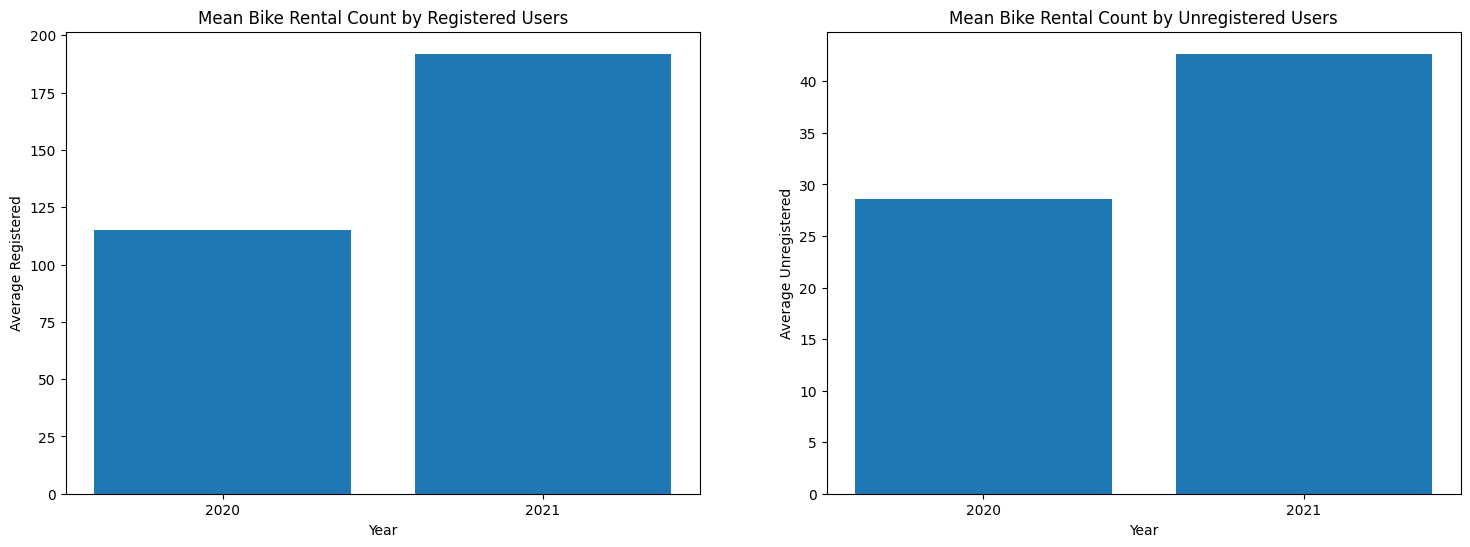

In [25]:
# df
avg_registered_df = bike_df.groupby('year')['registered'].mean()
avg_unregistered_df = bike_df.groupby('year')['unregistered'].mean()

# subplot
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18, 6))

# plot reg
ax[0].bar(avg_registered_df.index, avg_registered_df.values, color='#1f77b4')
ax[0].set_title('Mean Bike Rental Count by Registered Users')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Average Registered')

# plot unreg
ax[1].bar(avg_unregistered_df.index, avg_unregistered_df.values, color='#1f77b4')
ax[1].set_title('Mean Bike Rental Count by Unregistered Users')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Average Unregistered')

# rename
for axis in ax:
    axis.set_xticks([0, 1])
    axis.set_xticklabels(['2020', '2021'])

plt.show()


Melakukan pengelompokkan data berdasarkan tahun dan perhitungan rata-rata jumlah penyewaan sepeda tiap tahunnya untuk setiap jenis pengguna. Ubah nama tahun menjadi nama sebenarnya. Set label sumbu x menjadi tahun dan label sumbu y berupa rata-rata jumlah penyewaan.

Membuat subplot dengan 2 kolom. Kolom pertama untuk menunjukan registered users dan kolom kedua untuk unregistered users.

### Bagaimana distribusi permintaan peminjaman sepeda pada hari kerja dan hari libur?

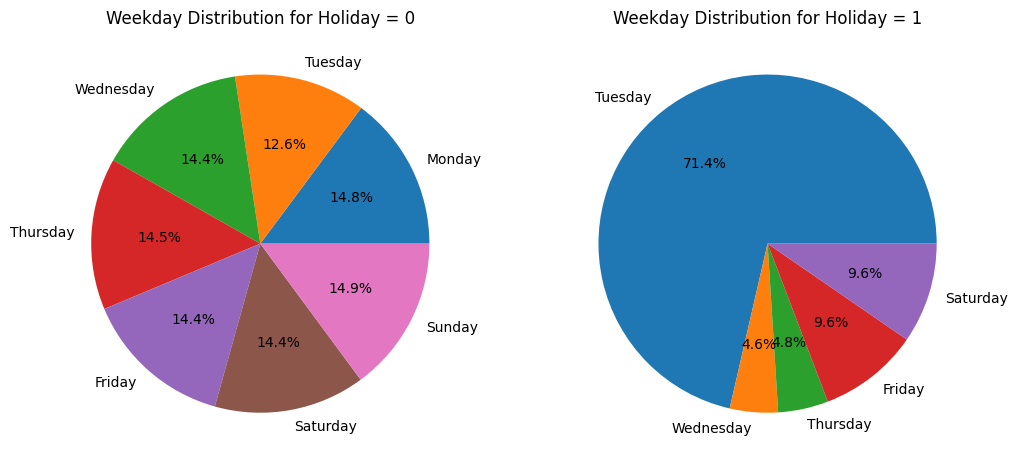

In [32]:
# weekday
weekday_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# ambil holiday = 0 dan holiday = 1
holiday_0 = bike_df[bike_df['holiday'] == 0]
holiday_1 = bike_df[bike_df['holiday'] == 1]

# group dan hitung jumlah kemunculan
weekday_counts_0 = holiday_0.groupby('weekday').size()
weekday_counts_1 = holiday_1.groupby('weekday').size()

# plot holiday = 0 (working days)
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.pie(weekday_counts_0, labels=[weekday_names[idx] for idx in weekday_counts_0.index], autopct='%1.1f%%')
plt.title('Weekday Distribution for Holiday = 0')

# plot holiday = 1 (holiday)
plt.subplot(1, 2, 2)
plt.pie(weekday_counts_1, labels=[weekday_names[idx] for idx in weekday_counts_1.index], autopct='%1.1f%%')
plt.title('Weekday Distribution for Holiday = 1')

plt.show()


Melakukan pengelompokkan data berdasarkan hari kerja (holiday = 0) dan hari libur (holiday = 1) serta  perhitungan rata-rata jumlah penyewaan sepedanya. Ubah nama hari menjadi nama sebenarnya.

Menggunakan pie chart untuk memvisualisasikan distribusi datanya. Tiap potongan pie labelnya dari nama-nama hari yang telah sesuai dengan standard international (monday = 0, tuesday = 1, dst). Autopct='%1.1f%%' digunakan untuk menampilkan persentase di setiap potongan pie.

## Conclusion

### Pertanyaan 1: Bagaimana rata-rata penyewaan pada setiap musim?

Data menunjukan bahwa rata-rata permintaan peminjaman sepeda tertinggi terjadi di musim gugur dan permintaan terendah terjadi di musim semi. Ketiga musim lainnya terlihat berada di antara angka 200, sedangkan musim semi tidak sampai rata-rata 150 permintaan.

### Pertanyaan 2: Bagaimana rata-rata penyewaan sepeda pada hari kerja dan hari libur?

Total rata-rata permintaan peminjaman pada tahun 2021 lebih tinggi. Hal ini juga sebanding lurus dengan naiknya jumlah permintaan dari pengguna unregistered sebesar 48.28%. Walaupun begitu, gap nilai registered dan unregistered sangatlah jauh. Angka unregistered tidak menyentuh angka 100 pada tahun 2020 dan 2021.

### Pertanyaan 3: Bagaimana distribusi permintaan peminjaman sepeda pada hari kerja dan hari libur?

Permintaan cenderung merata pada hari kerja, tetapi meningkat secara signifikan pada hari libur, terutama pada hari Selasa dengan presentase sebesar 71.4%. Kemungkinan pada hari kerja, sebagian penduduk menggunakan penyewaan sepeda dan menyewa sepeda sudah menjadi suatu hal yang mereka lakukan sehari-hari kerja.